# Non-parametrics hypothesis testing


## Task 1

Compare $\alpha_{II}$ and $\beta = 1 - \alpha_{II}$ of t-test and Mann-Whitney test applied
to normal data. (You have to take N samples x1, . . . xn from N (a1, σ2
1
),
and N samples y1, . . . yn from N (a2, σ2
2
) – σ
2
1 might be equal to σ
2
2 – and
test the hypothesis for each pair of samples.)


In [1]:
import numpy as np
from statistics import mean
from scipy import stats
import matplotlib.pyplot as plt
import math

In [2]:
def generate_pair(n = 20, mu1 = 0, mu2 = 500, sigma = 1):
    X1 = np.random.normal(mu1, sigma, n)
    X2 = np.random.normal(mu2, sigma, n)
    return [X1, X2]

In [53]:
def alpha_2_err(alpha, mu1 = 0, mu2 = 2, var = 1, n = 100):
    t_test_2_err = 0
    mw_2_err = 0
    for i in range(n):
        x1, x2 = generate_pair(100, mu1, mu2, var)
        # print(stats.ttest_ind(x1, x2))
        if stats.ttest_ind(x1, x2).pvalue > alpha:
            t_test_2_err += 1
        # print(stats.mannwhitneyu(x1, x2, method="exact"))
        #if stats.mannwhitneyu(x1, x2, method="exact").pvalue >= alpha:
        if stats.mannwhitneyu(x1, x2).pvalue > alpha:
            mw_2_err += 1
    return [t_test_2_err/n, mw_2_err/n]


def test_2_error(mu1 = 0, mu2 = 1, var = 5):
    alpha_t_test_2_errors = []
    alpha_mw_2_errors = []
    for j in np.arange(0, 1.01, 0.01):
        t_test_err_2, mw_err_2 = alpha_2_err(j, mu1, mu2, var, 100)
        alpha_t_test_2_errors.append(t_test_err_2)
        alpha_mw_2_errors.append(mw_err_2)
    return [np.arange(0, 1.01, 0.01), alpha_t_test_2_errors, alpha_mw_2_errors]

In [54]:
dots = test_2_error(1.5, 1.6, 1)
#dots

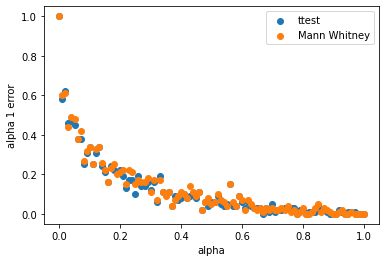

In [55]:
xs = dots[0]
y1s = dots[1]
plt.scatter(xs, y1s, label='ttest')

y2s = dots[2]
plt.scatter(xs, y2s, label='Mann Whitney')

plt.xlabel("alpha")
plt.ylabel("alpha 2 error")
plt.legend()

They work almost equal, I have a note from lecture in my copybook, that it means that using Mann Whitney test is OK because power is almost not lost. And we see it in here.

## Task 2

In [90]:
n1 = 13
n2 = 14
sample1 = [13, 9, 16, 15, 10, 11, 12, 8, 10, 12, 5, 14, 10]
sample2 = [15, 9, 18, 12, 14, 17, 20, 19, 16, 13, 14, 17, 10, 9]
total = 600

crits = {0.05: 56}

In [61]:
stats.mannwhitneyu(sample1, sample2)

MannwhitneyuResult(statistic=45.0, pvalue=0.026639880210561392)

In [62]:
stats.mannwhitneyu(sample1, sample2, method="exact")

MannwhitneyuResult(statistic=45.0, pvalue=0.02546855915007752)

In [106]:
values = [*sample1, *sample2]
values.sort()

ranks = dict()

prev_idx = -1
ctr = 0
for i, val in enumerate(values):
    if values[prev_idx] == val:
        ctr += 1
        if i + 1 < len(values) and values[i + 1] != values[prev_idx]:
            ranks[val] = ctr / 2 + prev_idx + 1
            ctr = 0
    else:
        ranks[val] = i + 1
        prev_idx = i
    

print(ranks)

print(values)

{5: 1, 8: 2, 9: 4.0, 10: 7.5, 11: 10, 12: 12.0, 13: 14.5, 14: 17.0, 15: 19.5, 16: 21.5, 17: 23.5, 18: 25, 19: 26, 20: 27}
[5, 8, 9, 9, 9, 10, 10, 10, 10, 11, 12, 12, 12, 13, 13, 14, 14, 14, 15, 15, 16, 16, 17, 17, 18, 19, 20]


In [107]:
def W(sample):
    return sum([ranks[i] for i in sample])

In [112]:
def U(sample1,  sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    sum_1 = n1*n2 + n1*(n1 + 1)/2 - W(sample1)
    sum_2 = n1*n2 + n2*(n2 + 1)/2 - W(sample2)
    return min(sum_1, sum_2)

U(sample1, sample2)

45.0

Using normal approximation we will have

$\frac{(U-\mu)}{\sigma} \to N(0, 1)$

where

$\mu = \frac{n_1 n_2}{2}$

and

$\sigma = \sqrt{(n_1 n_2 (n_1+n_2+1)) / 12}$

In [120]:
n1 = len(sample1)
n2 = len(sample2)

# I found it here https://www.leansigmacorporation.com/mann-whitney-testing-with-minitab/
U_norm = (U(sample1, sample2) - 0.5*n1*n2) / (1/12*n1*n2*(n1+n2+1))**(1/2)

U_norm

-2.23220329588506

In [121]:
from scipy.stats import norm

In [122]:
norm.cdf(U_norm)

0.012800764846356815

Statistics of the criteria using my test and standart library test is equal.
Pvalue in both cases is low.
We reject the null hypothesis.